In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,53.389041,6.918226,9.555589,3.210016,23.499851
1,33.200641,7.185055,9.824637,6.400242,19.589033
2,59.122510,3.694101,7.250045,-5.959473,16.310004
3,54.007512,0.219448,10.465824,-5.886842,15.856707
4,54.517924,31.336474,7.953987,16.536343,27.339869


<Axes: ylabel='Density'>

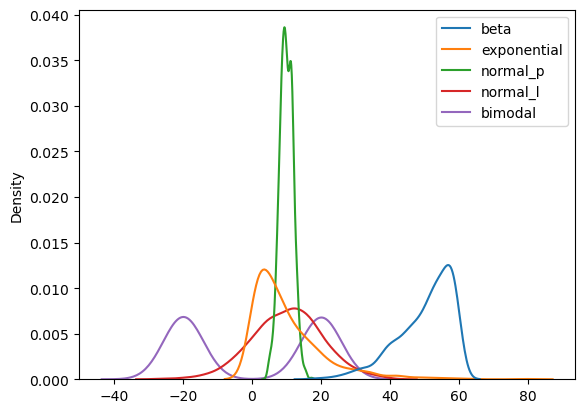

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()


,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.285478,10.360219,10.056706,10.385665,0.177425
std,8.030929,10.360638,1.937486,10.198227,20.170940
min,18.496157,0.006655,4.542482,-25.815386,-28.286622
25%,45.582524,3.106223,8.717435,3.683732,-19.840539
50%,52.435501,7.177283,9.972543,10.867389,-0.345765
75%,56.846402,14.585716,11.451052,16.941496,20.210730
max,59.992252,79.396315,17.339197,40.130035,28.667667


<Axes: ylabel='Density'>

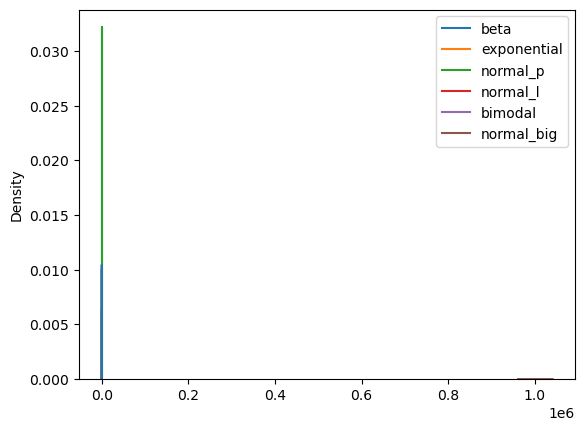

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

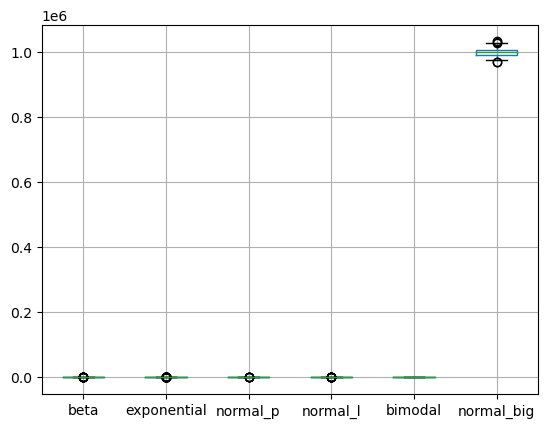

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.840872,0.087059,0.391750,0.440143,0.909264,0.416730
1,0.354358,0.090420,0.412774,0.488520,0.840598,0.551708
2,0.979040,0.046447,0.211583,0.301096,0.783025,0.514833
3,0.855776,0.002680,0.462880,0.302198,0.775066,0.320268
4,0.868076,0.394633,0.266592,0.642224,0.976687,0.772783


<Axes: ylabel='Density'>

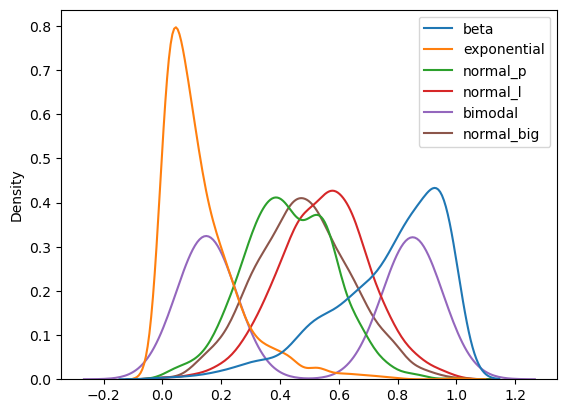

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<Axes: >

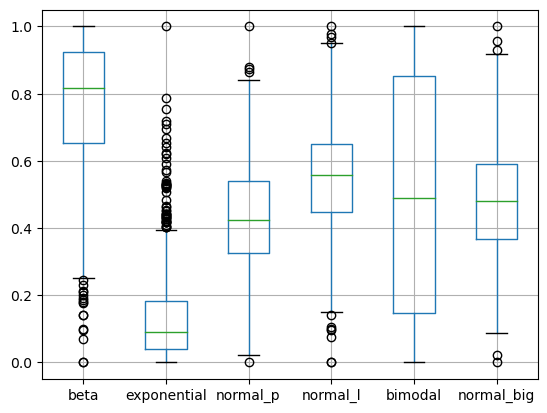

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.766080,0.130415,0.430909,0.548955,0.499770,0.480920
std,0.193535,0.130504,0.151405,0.154646,0.354160,0.161940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.652745,0.039042,0.326252,0.447326,0.148296,0.367724
50%,0.817892,0.090322,0.424332,0.556260,0.490584,0.478942
75%,0.924189,0.183639,0.539871,0.648368,0.851514,0.588926
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [17]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [18]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[18.49615715269986,
 0.006655196727522282,
 4.542481563565443,
 -25.815386414327236,
 -28.286621605302194,
 968981.1224025617]

In [19]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [20]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99225196978604,
 79.3963148013518,
 17.33919706011383,
 40.13003465447776,
 28.667667186365602,
 1033130.7427504901]

In [21]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999982]